In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/teacher_shortage_data.csv')

In [3]:
#Check for any NaN values
data[data.isna().any(axis=1)]

,country,year,teachers_needed,teachers_available,teacher_attrition_rate,average_salary,student_teacher_ratio,working_conditions,training_quality


In [4]:
data.head()

,country,year,teachers_needed,teachers_available,teacher_attrition_rate,average_salary,student_teacher_ratio,working_conditions,training_quality
0,USA,2023,100000,95000,5,50000,20,8,7
1,China,2023,150000,140000,4,45000,25,7,8
2,India,2023,200000,180000,10,30000,30,6,6
3,Brazil,2023,80000,75000,6,40000,22,7,7
4,Russia,2023,60000,58000,3,55000,18,9,8


In [5]:
# Calculate teacher shortage
data['teacher_shortage'] = data['teachers_needed'] - data['teachers_available']

In [6]:
data.head()

,country,year,teachers_needed,teachers_available,teacher_attrition_rate,average_salary,student_teacher_ratio,working_conditions,training_quality,teacher_shortage
0,USA,2023,100000,95000,5,50000,20,8,7,5000
1,China,2023,150000,140000,4,45000,25,7,8,10000
2,India,2023,200000,180000,10,30000,30,6,6,20000
3,Brazil,2023,80000,75000,6,40000,22,7,7,5000
4,Russia,2023,60000,58000,3,55000,18,9,8,2000


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 5 non-null      object
 1   year                    5 non-null      int64 
 2   teachers_needed         5 non-null      int64 
 3   teachers_available      5 non-null      int64 
 4   teacher_attrition_rate  5 non-null      int64 
 5   average_salary          5 non-null      int64 
 6   student_teacher_ratio   5 non-null      int64 
 7   working_conditions      5 non-null      int64 
 8   training_quality        5 non-null      int64 
 9   teacher_shortage        5 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 532.0+ bytes


In [8]:
# Correlation analysis
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                        year  teachers_needed  teachers_available  \
year                     NaN              NaN                 NaN   
teachers_needed          NaN         1.000000            0.999433   
teachers_available       NaN         0.999433            1.000000   
teacher_attrition_rate   NaN         0.743559            0.723793   
average_salary           NaN        -0.783317           -0.767053   
student_teacher_ratio    NaN         0.958078            0.950971   
working_conditions       NaN        -0.834630           -0.827250   
training_quality         NaN        -0.568705           -0.548700   
teacher_shortage         NaN         0.971549            0.963023   

                        teacher_attrition_rate  average_salary  \
year                                       NaN             NaN   
teachers_needed                       0.743559       -0.783317   
teachers_available                    0.723793       -0.767053   
teacher_attrition_rate                1.00000

In [9]:
# Identify key factors contributing to teacher shortage
key_factors = correlation_matrix['teacher_shortage'].sort_values(ascending=False)
print("Key Factors Contributing to Teacher Shortage:\n", key_factors)

Key Factors Contributing to Teacher Shortage:
 teacher_shortage          1.000000
student_teacher_ratio     0.976985
teachers_needed           0.971549
teachers_available        0.963023
teacher_attrition_rate    0.858461
training_quality         -0.690957
working_conditions       -0.859467
average_salary           -0.872292
year                           NaN
Name: teacher_shortage, dtype: float64


C:\Users\elmin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


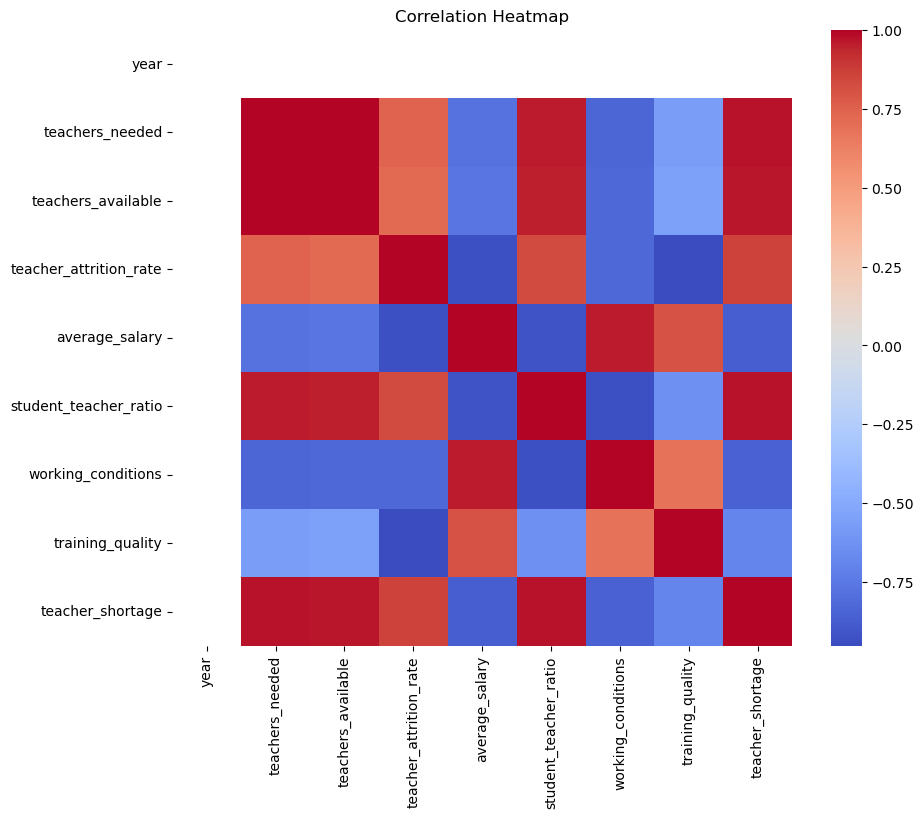

In [10]:
# Step 4: Data Visualization
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

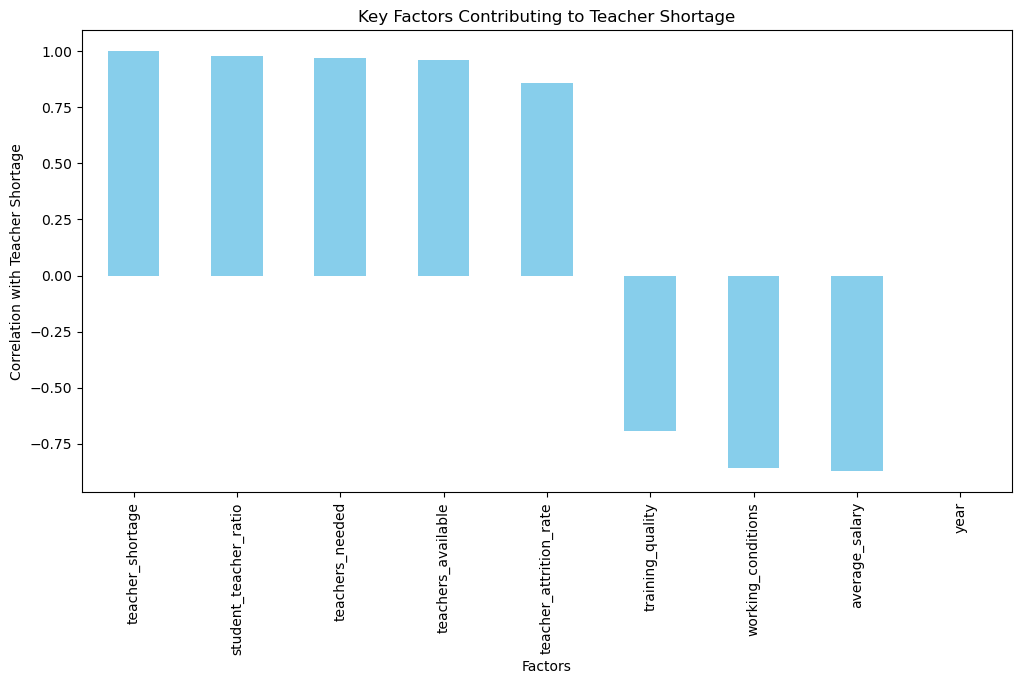

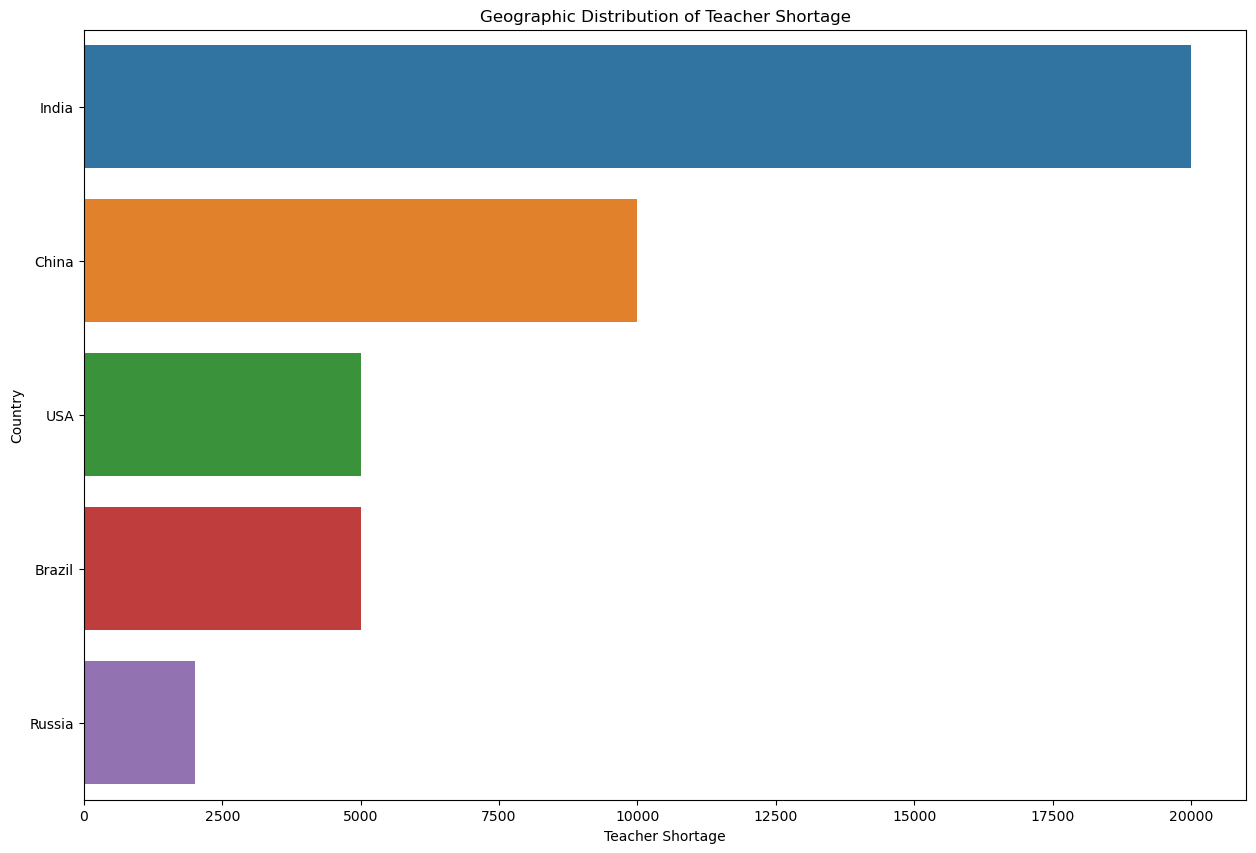

In [21]:
# Bar plot of key factors
plt.figure(figsize=(12, 6))
key_factors.plot(kind='bar', color='skyblue')
plt.title('Key Factors Contributing to Teacher Shortage')
plt.xlabel('Factors')
plt.ylabel('Correlation with Teacher Shortage')
plt.show()

# Example: Geographic distribution of teacher shortage
# Assume we have columns 'country' and 'teacher_shortage'
plt.figure(figsize=(15, 10))
sns.barplot(x='teacher_shortage', y='country', data=data.sort_values('teacher_shortage', ascending=False))
plt.title('Geographic Distribution of Teacher Shortage')
plt.xlabel('Teacher Shortage')
plt.ylabel('Country')
plt.show()

In [ ]:
columns_to_plot = [
    'teacher_shortage', 
    'teacher_attrition_rate', 
    'average_salary', 
    'student_teacher_ratio', 
    'working_conditions', 
    'training_quality'
]

# Create pair plot
sns.pairplot(data[columns_to_plot], diag_kind='kde', markers='+');
plt.suptitle('Pair Plot for Teacher Shortage Data', y=1.02)
plt.show();

In [19]:
#sns.pairplot(data[columns_to_plot]